# **Proyecto computación blanda**

---
\
**Tema a tratar:** Sistema que es capaz de obtener texto de una fuente externa. El objetivo es reconocer patrones de lenguaje, de modo que se pueda establecer la naturaleza del texto. Reconocer:


*   El tema
*   Personajes
*   Si el texto es positivo, negativo o neutro


Se instala la libreria textblob, con esta se va hacer un análisis de sentimientos a los diferentes textos.
También se hace uso de la libreria traslate para poder hacer una traducción de español a inglés

In [ ]:
pip install -U textblob

In [ ]:
pip install translate

In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd

In [ ]:
from textblob import TextBlob
t=TextBlob("It tells the story of a 13-year-old girl, Ofelia, who moves with her mother Carmen (pregnant and therefore in a delicate state of health) to a town in the Aragonese Pyrenees where her stepfather Vidal is, who wants to be close to her woman when the child is born. This man is a cruel captain of the Francoist Armed Police and his mission is to eliminate the last republican rebels hidden in the mountains of the area.")

for s in t.sentences:
  print(s)
  print(s.sentiment[0])


It tells the story of a 13-year-old girl, Ofelia, who moves with her mother Carmen (pregnant and therefore in a delicate state of health) to a town in the Aragonese Pyrenees where her stepfather Vidal is, who wants to be close to her woman when the child is born.
0.07777777777777778
This man is a cruel captain of the Francoist Armed Police and his mission is to eliminate the last republican rebels hidden in the mountains of the area.
-0.3888888888888889


In [ ]:
valuesSentiment = [0,0,0]
for s in t.sentences:
  if(s.sentiment[0] >- 0.333 and s.sentiment[0] < 0.333):
    valuesSentiment[0] += 1
  if(s.sentiment[0] > 0.333):
    valuesSentiment[1] += 1
  if(s.sentiment[0] < -0.333):
    valuesSentiment[2] += 1
print(valuesSentiment)

[1, 0, 1]


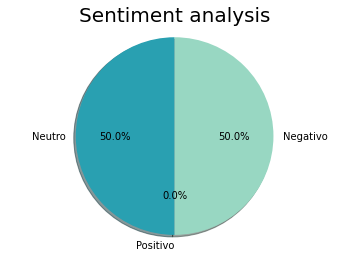

In [ ]:
import matplotlib.pyplot as plt

labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(valuesSentiment, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Sentiment analysis', fontsize = 20)
plt.axis('equal')
plt.show()

In [ ]:
t=TextBlob("It tells the story of a 13-year-old girl, Ofelia, who moves with her mother Carmen (pregnant and therefore in a delicate state of health) to a town in the Aragonese Pyrenees where her stepfather Vidal is, who wants to be close to her woman when the child is born. This man is a cruel captain of the Francoist Armed Police and his mission is to eliminate the last republican rebels hidden in the mountains of the area.")
#ten=t.translate(to="en")
print(t)
res = t.sentiment[0]
print(res)
if(res <-0.333):
  print("texto negativo")
if(res >0.333):
  print("texto positivo")
if(res >- 0.333 and res < 0.333):
  print("texto neutro")

It tells the story of a 13-year-old girl, Ofelia, who moves with her mother Carmen (pregnant and therefore in a delicate state of health) to a town in the Aragonese Pyrenees where her stepfather Vidal is, who wants to be close to her woman when the child is born. This man is a cruel captain of the Francoist Armed Police and his mission is to eliminate the last republican rebels hidden in the mountains of the area.
-0.15555555555555553
texto neutro


Se hace uso de la libreria transformers, concretamente el módulo pipeline para hacer un tratamiento a los diferentes textos.


In [ ]:
#Install and import the pipeline of transformers
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
# Get thetask-specific pipeline
my_model=pipeline(task="question-answering")

context = r"""Harry Potter is the best book series according to many people. Harry Potter was written by JK.Rowling.
 It is afantasy based novel that provides a thrilling experience to readers.Harry Potter and Ron Weasley are main characters"""


# Pass the question and context to the model to obtain answer

print(my_model(question="Who are characters in the book?", context=context))
print(my_model(question="what is the genre of the book?", context=context))
print(my_model(question="Who wrote Harry Potter ?", context=context))

#> {'score': 0.2375375191101107, 'start': 17, 'end': 37, 'answer': 'the best book series'}
#> {'score': 0.3054330348968506, 'start': 111, 'end': 131, 'answer': 'afantasy based novel'}
#> {'score': 0.9813234768798256, 'start': 92, 'end': 102, 'answer': 'JK.Rowling'}

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

{'score': 0.9923561811447144, 'start': 179, 'end': 207, 'answer': 'Harry Potter and Ron Weasley'}
{'score': 0.274001806974411, 'start': 110, 'end': 130, 'answer': 'afantasy based novel'}
{'score': 0.982893168926239, 'start': 91, 'end': 101, 'answer': 'JK.Rowling'}


In [ ]:
ner_pipe = pipeline("ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

In [ ]:
for entity in ner_pipe(context):
  print(entity)

{'entity': 'I-MISC', 'score': 0.9660781, 'index': 1, 'word': 'Harry', 'start': 0, 'end': 5}
{'entity': 'I-MISC', 'score': 0.96956396, 'index': 2, 'word': 'Potter', 'start': 6, 'end': 12}
{'entity': 'I-MISC', 'score': 0.9773933, 'index': 13, 'word': 'Harry', 'start': 63, 'end': 68}
{'entity': 'I-MISC', 'score': 0.97383106, 'index': 14, 'word': 'Potter', 'start': 69, 'end': 75}
{'entity': 'I-PER', 'score': 0.9975682, 'index': 18, 'word': 'J', 'start': 91, 'end': 92}
{'entity': 'I-PER', 'score': 0.9938856, 'index': 19, 'word': '##K', 'start': 92, 'end': 93}
{'entity': 'I-PER', 'score': 0.9559991, 'index': 20, 'word': '.', 'start': 93, 'end': 94}
{'entity': 'I-PER', 'score': 0.9982571, 'index': 21, 'word': 'Row', 'start': 94, 'end': 97}
{'entity': 'I-PER', 'score': 0.9629964, 'index': 22, 'word': '##ling', 'start': 97, 'end': 101}
{'entity': 'I-PER', 'score': 0.9985966, 'index': 41, 'word': 'Harry', 'start': 179, 'end': 184}
{'entity': 'I-PER', 'score': 0.99892175, 'index': 42, 'word': 'Po

In [ ]:
for entity in ner_pipe(context):
  if (entity['entity'] == 'I-PER'):
    print(entity['entity'], entity['word'])

I-PER J
I-PER ##K
I-PER .
I-PER Row
I-PER ##ling
I-PER Harry
I-PER Potter
I-PER Ron
I-PER We
I-PER ##as
I-PER ##ley
